# Visualising Pre-training Performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
# !cp base_results.csv /home/local/data/sophie/imagenet/output/
base_df = pd.read_csv("/home/local/data/sophie/imagenet/output/base_results.csv")
base_df['Weights'] = "base"
base_gpu_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/base_results.csv")
base_gpu_df['Weights'] = "base_Full_GPU"
grey_df = pd.read_csv("/home/local/data/sophie/imagenet/output/grey_results.csv")
grey_df['Weights'] = "grey"

# results_df = pd.concat([base_df,base_gpu_df, grey_df])
geti_grey_df = pd.read_csv("/home/local/data/sophie/imagenet/output/geti_grey_results.csv")
geti_grey_df['Weights'] = "geti_grey"
# results_df = pd.concat([base_df,base_gpu_df, grey_df, geti_grey_df])

base_gpu_64_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/base_64_results.csv")
base_gpu_64_df['Weights'] = "base_64_Full_GPU"

single_gpu_64_df = pd.read_csv("/home/local/data/sophie/imagenet/output/FullGPU/single_64_results.csv")
single_gpu_64_df['Weights'] = "single_64_Full_GPU"

single_df = pd.read_csv("/home/local/data/sophie/imagenet/output/single_results.csv")
single_df['Weights'] = "single"

results_df = pd.concat([base_df,base_gpu_df, grey_df, geti_grey_df,base_gpu_64_df,single_gpu_64_df,single_df])


<Axes: xlabel='Epoch', ylabel='AP'>

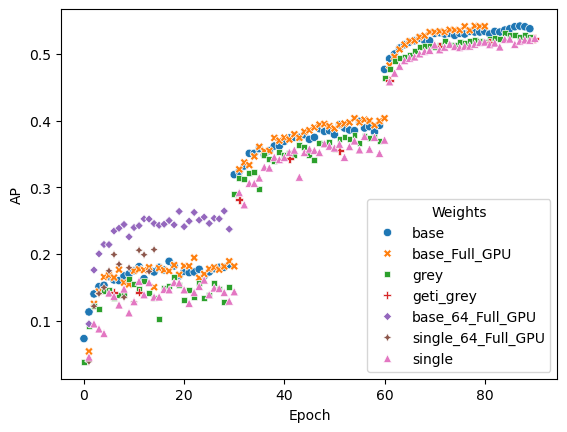

In [245]:
sns.scatterplot(data=results_df[results_df["Epoch"]<=90], x="Epoch", y="AP", hue="Weights",style="Weights")

In [246]:
long_grey = grey_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_grey['Weights'] = "Grey"

long_base = base_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base['Weights'] = "Base"

long_single = single_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_single['Weights'] = "Single"

long_base_gpu = base_gpu_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base_gpu['Weights'] = "Base_GPU"

long_base_64_gpu = base_gpu_64_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base_64_gpu['Weights'] = "Base_GPU_64"

long_geti_grey = geti_grey_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_geti_grey['Weights'] = "Geti_Grey"

long_single_64_gpu = single_gpu_64_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_single_64_gpu['Weights'] = "Single_GPU_64"

long_results = pd.concat([long_grey,long_base,long_base_gpu,long_geti_grey, long_base_64_gpu,long_single_64_gpu, long_single])
# long_results = pd.concat([long_grey,long_base,long_base_gpu])
long_results.head()

,Epoch,Variable,Value,Weights
0,0,AP,0.038,Grey
1,1,AP,0.092,Grey
2,2,AP,0.122,Grey
3,3,AP,0.118,Grey
4,4,AP,0.145,Grey


Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

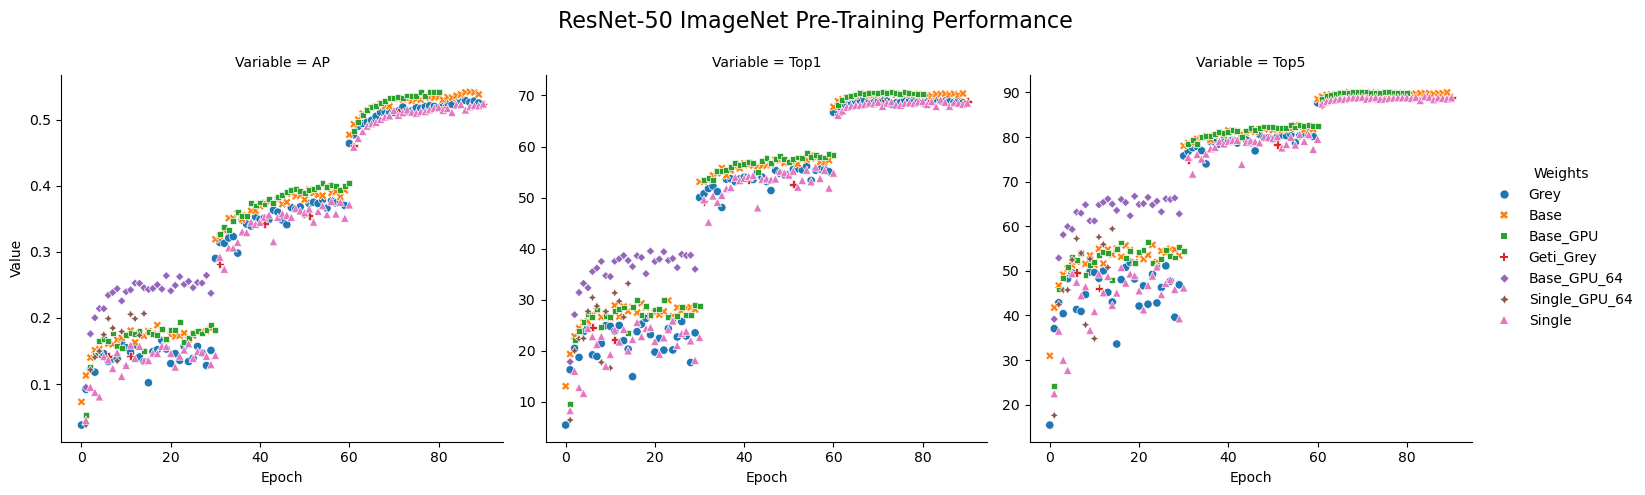

In [247]:
metricplot = sns.relplot(data=long_results[long_results["Epoch"]<=90], x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, style="Weights", kind="scatter")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'Single Channel ResNet-50 ImageNet Pre-Training Performance')

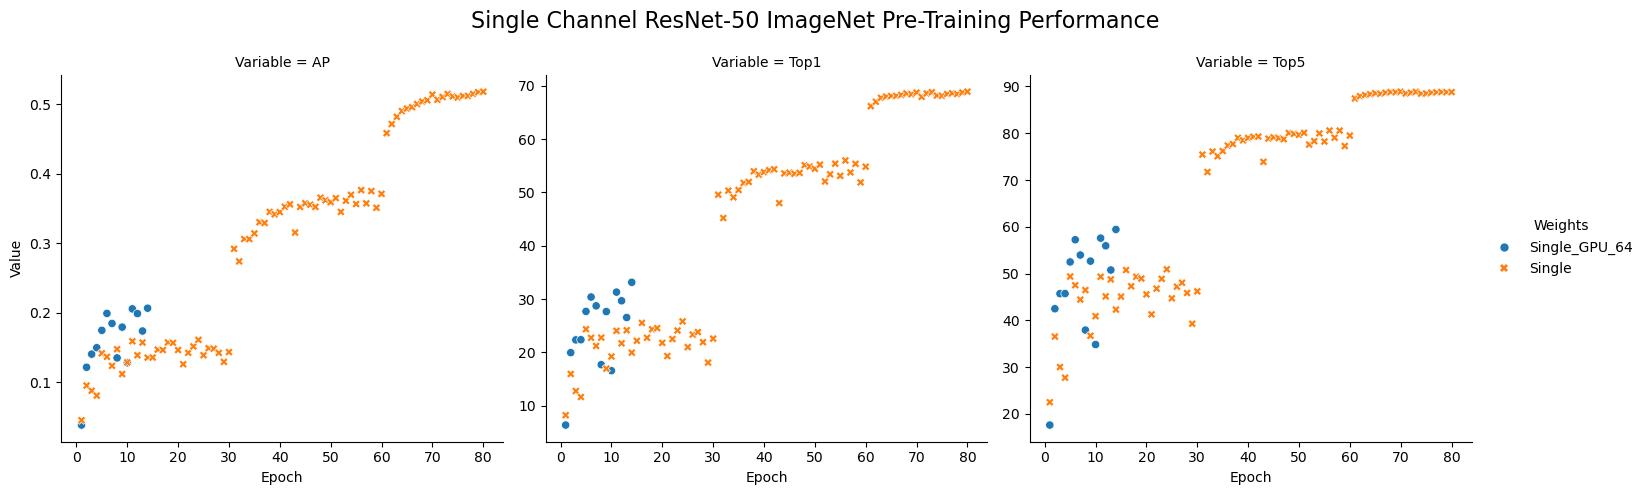

In [248]:
metricplot = sns.relplot(data=long_results.query("('Single' in Weights | 'Single_GPU_64' in Weights) & Epoch <= 80"), x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, style="Weights", kind="scatter")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('Single Channel ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'Colour Base ResNet-50 ImageNet Pre-Training Performance')

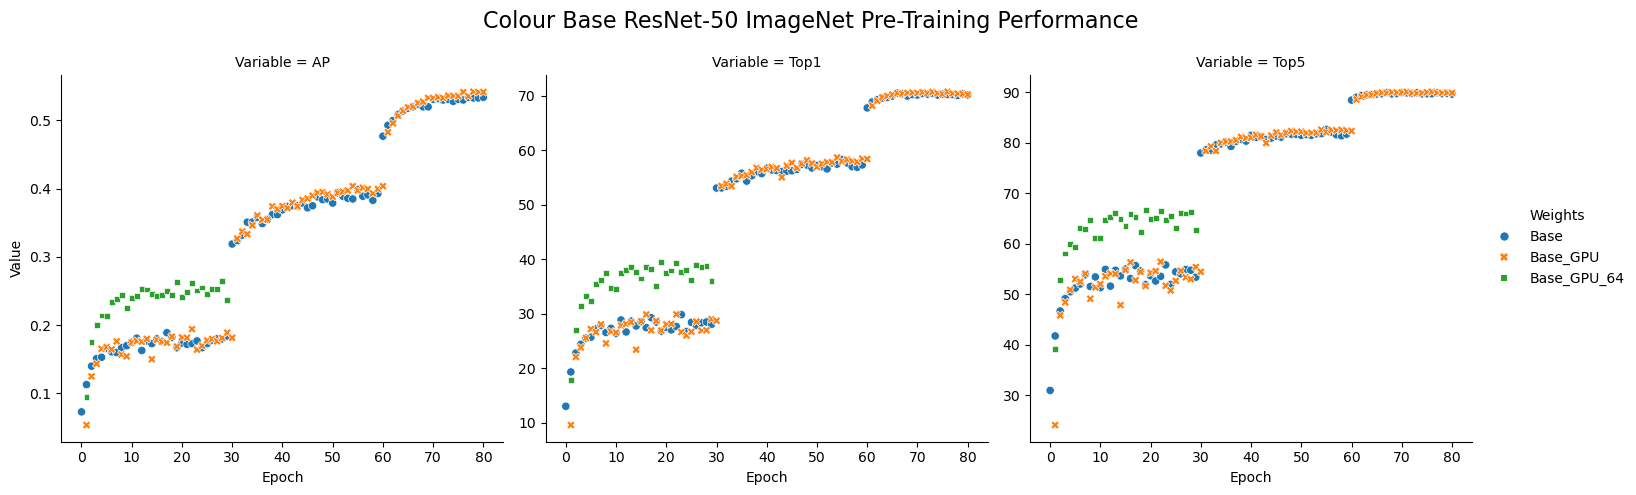

In [249]:
metricplot = sns.relplot(data=long_results.query("('Base' in Weights | 'Base_GPU' in Weights |'Base_GPU_64' in Weights ) & Epoch <= 80"), x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, style="Weights", kind="scatter")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('Colour Base ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

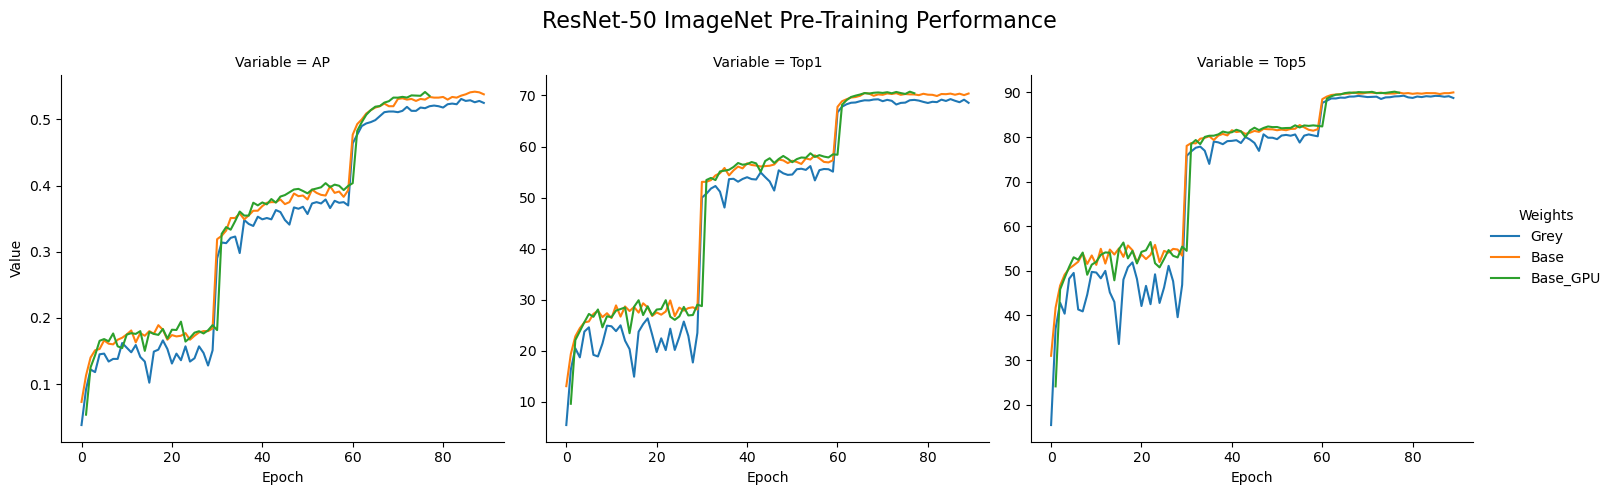

In [61]:
metricplot = sns.relplot(data=long_results[long_results["Epoch"]<=90], x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, kind="line")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

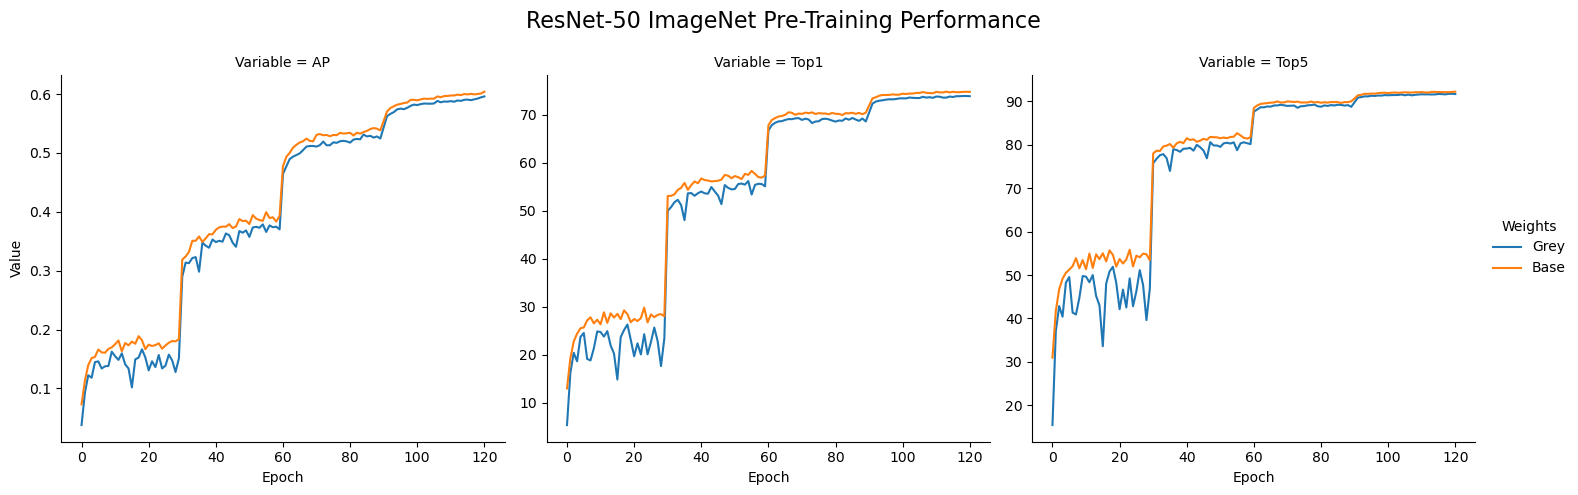

In [94]:
metricplot = sns.relplot(data=long_results, x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, kind="line")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

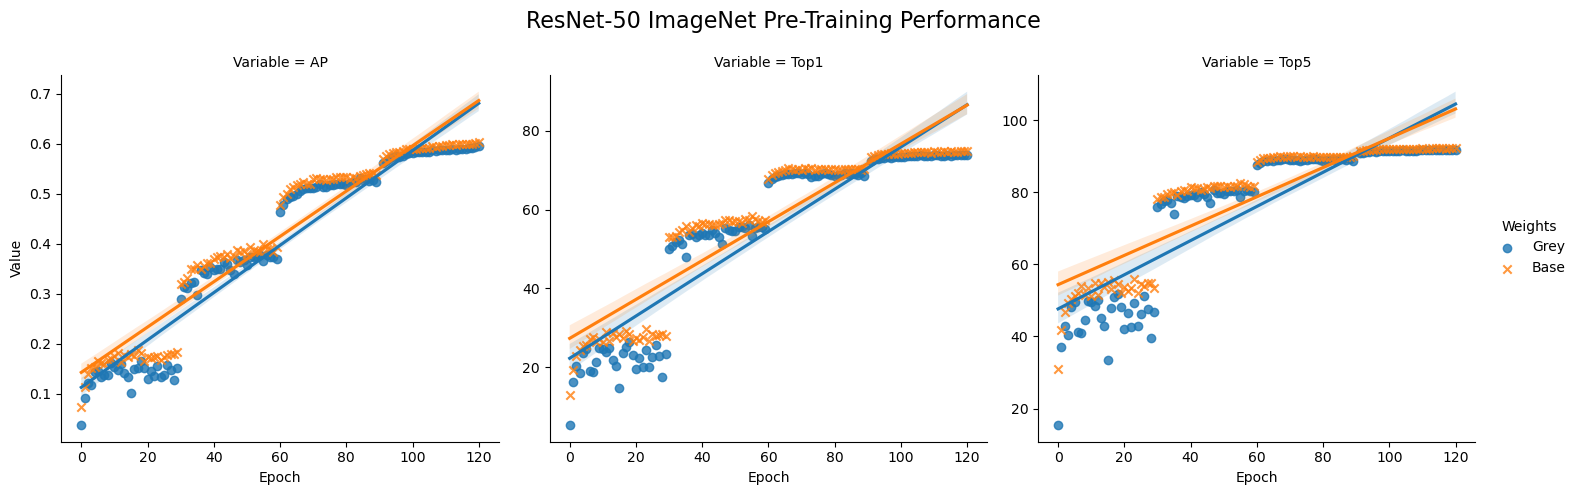

In [95]:
metricplot = sns.lmplot(data=long_results, x="Epoch", y="Value", hue="Weights", col = "Variable", \
                        facet_kws={'sharey': False, 'sharex': True},markers=['o', 'x'])
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')